In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image.

histSize = BINS

DIMS - It is the number of parameters for which we collect the data. If we are collecting only intensity value, it is 1.

RANGE- Range of intensity values you want to measure. 

##### Histogram Calculation in OpenCV

We use **cv2.calcHist()**

    cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

- images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
- channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask.
- histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256]

In [7]:
img = cv2.imread('images/scenic.jpg', 0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

###### Histogram Calculation in Numpy

Numpy also provides you a function, np.histogram(). So instead of calcHist() function, you can try below line :

In [3]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

hist is same as we calculated before. But bins will have 257 elements, because Numpy calculates bins as 0-0.99, 1-1.99, 2-2.99 etc. So final range would be 255-255.99. To represent that, they also add 256 at end of bins. But we don’t need that 256. Upto 255 is sufficient.

> Numpy has another function, np.bincount() which is much faster than (around 10X) np.histogram(). So for one-dimensional histograms, use that. Don’t forget to set minlength = 256 in np.bincount. For example, hist = np.bincount(img.ravel(),minlength=256)

> OpenCV function is more faster than (around 40X) than np.histogram(). So stick with OpenCV function.

##### Plotting Histograms

###### 1. Using Matplotlib

**pyplot.hist()**

No need to use calcHist() or np.histogram()

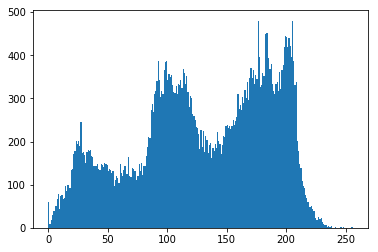

In [4]:
img = cv2.imread('images/scenic.jpg', 0)
plt.hist(img.ravel(), 256, [0, 256]);

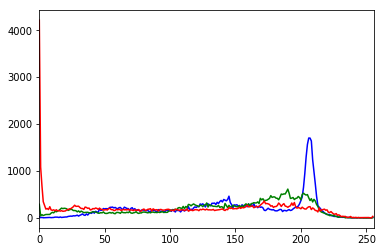

In [13]:
color = ('b', 'g', 'r')
img = cv2.imread('images/scenic.jpg') #reading color image
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

##### Application of Mask

We use Mask to find histograms of some regioins of an image. Just create a mask image with white color on the region you want to find histogram and black otherwise. Then pass this as the mask.

(0, 256)

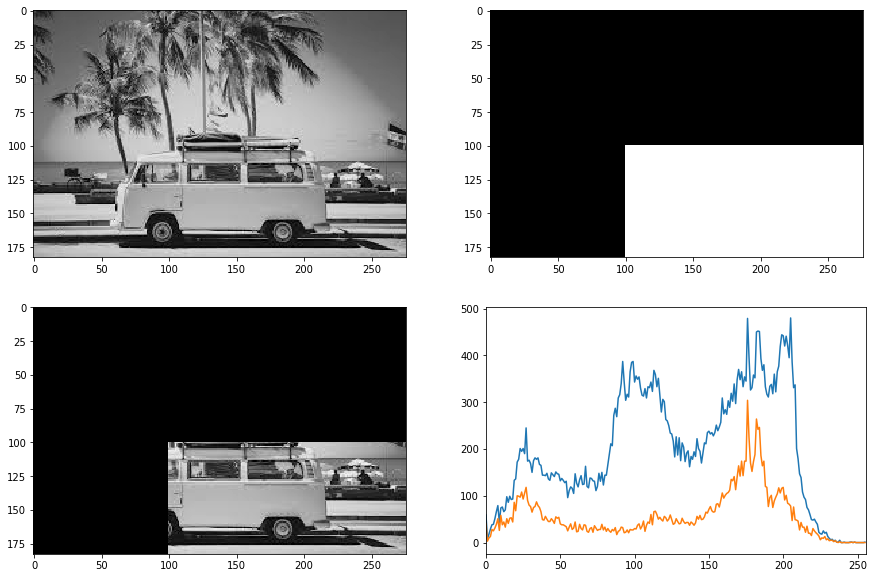

In [17]:
img = cv2.imread('images/scenic.jpg', 0)

mask = np.zeros(img.shape[:2], np.uint8)
mask[100:200, 100:400] = 255
masked_img = cv2.bitwise_and(img, img, mask = mask)

hist_full = cv2.calcHist([img], [0], None, [256], [0,256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0,256])

plt.figure(figsize = (15, 10))
plt.subplot(221)
plt.imshow(img, 'gray')
plt.subplot(222)
plt.imshow(mask, 'gray')
plt.subplot(223)
plt.imshow(masked_img, 'gray')
plt.subplot(224)
plt.plot(hist_full)
plt.plot(hist_mask)
plt.xlim([0,256])

